<a href="https://colab.research.google.com/github/PriyankaAdimulam12/Python_Intro/blob/main/SLR_MODEL_Example_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#reading a csv file using pandas library
wcat=pd.read_csv("wc-at.csv")


In [2]:
wcat.shape

(109, 2)

In [3]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [4]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [5]:
wcat.info()
wcat.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


,0
Waist,0
AT,0


In [6]:
wcat.columns

Index(['Waist', 'AT'], dtype='object')

Text(0.5, 1.0, 'Scatterplot btw Waist vs AT')

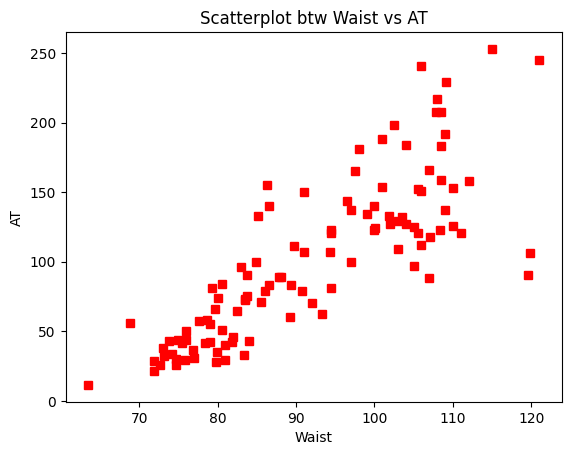

In [7]:
plt.plot(wcat.Waist,wcat.AT,"rs")
plt.xlabel("Waist")
plt.ylabel("AT")
plt.title("Scatterplot btw Waist vs AT")

In [8]:
wcat.corr()
#out:there is a +ve correlation btw both of them

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [9]:
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist",data=wcat).fit()
model.params #it returns a pandas Series containing the estimated coefficients (parameters) of the model
#i.e B0= -215.98 ; B1= 3.45
#now our model,i.e equa is,y=B0+B1(x),i.e At=B0+B1(wc).so here, At= -215.98+3.45(Wc)

,0
Intercept,-215.981488
Waist,3.458859


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.62e-27
Time:                        12:53:53   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

output: so here our R square value is 0.67 means that our model is just 67% accurate,so still we need to improve our model..

In [11]:
pred = model.predict(wcat.Waist)#This is predicted values of waist circumference
pred
#so now we calculate Error= Actual value(y,i.e A.t) - Predicted value
#error=25.72-42.56 =>-17(error value)

,0
0,42.568252
1,35.131704
2,66.953210
3,74.389758
4,42.222366
...,...
104,130.250337
105,106.730093
106,136.130398
107,157.229440


In [12]:
#so we can directly also know the values of Error
pred=model.predict(wcat.Waist)
model.resid
#out:so these are all the errors in our predictions

,0
0,-16.848252
1,-9.241704
2,-24.353210
3,-31.589758
4,-12.382366
...,...
104,-6.250337
105,-44.530093
106,-3.130398
107,50.770560


In [13]:
#To know the Total error we use Root mean square error..
rmse_lin=np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred))**2))
(rmse_lin)

np.float64(32.760177495755144)

Text(0, 0.5, 'AT')

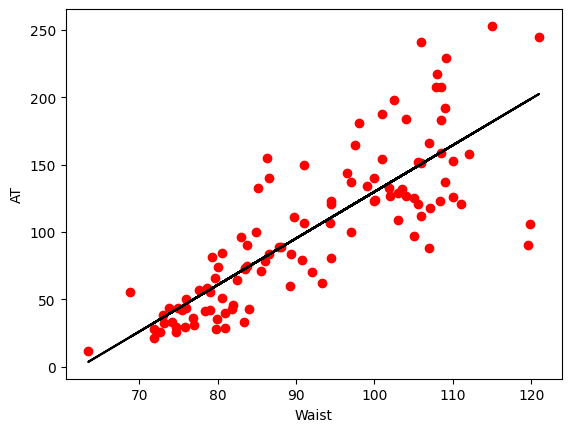

In [14]:
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='red')
plt.plot(wcat['Waist'],pred,color='black')
plt.xlabel("Waist")
plt.ylabel("AT")
#out:our model can be represented in black line..the top dotted values are actual values and bottom dotted values are predicted values..
#so this the model of RSquare=0.67 & Rmse=32.76,but our target is to get the RSquare=0.75..so for that there are some steps..


 To get the RSquare=0.75..so for that there are some steps..
1.Transformations..(in this we have logtransformation,exponential,sqare or quadratic,squareroot,&then u can combine log with square,log with sqaure root as well..)so this is modifying my equation using mathematical functions is Transformations..
It should help us in increasing the RSquare value & Decreasing the Error value(i.e Rmse)

In [15]:
#so here now we will apply log func in our model..lets see how,
#y=B0+B1(x),i.e At=B0+B1(wc),This is our intial model right,now we add log..
#This is our new Model..At=B0+B1log(wc),below is the code,hw we write this..
model2=smf.ols('AT~np.log(Waist)',data=wcat).fit

In [16]:
model2=smf.ols('AT~np.log(Waist)',data=wcat).fit()

out: RSquare value is slightly increased to 0.675
B0 = -1328.3420; B1 = 317.1356, are B0 & B1 values..

In [17]:
#NOW WE PREDICT THE VALUES..
pred2=model2.predict(pd.DataFrame(wcat['Waist']))
pred2

,0
0,39.828156
1,30.572779
2,68.410960
3,76.638769
4,39.403610
...,...
104,132.438233
105,110.127880
106,137.778929
107,156.234559


In [18]:
#RMSE value i.e total error value..
rmse_log = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred2))**2))
rmse_log

np.float64(32.49688490932126)

out: previously our RMSE=32.76 ,now it is 32.49,slight decrease in error value..

Text(0, 0.5, 'AT')

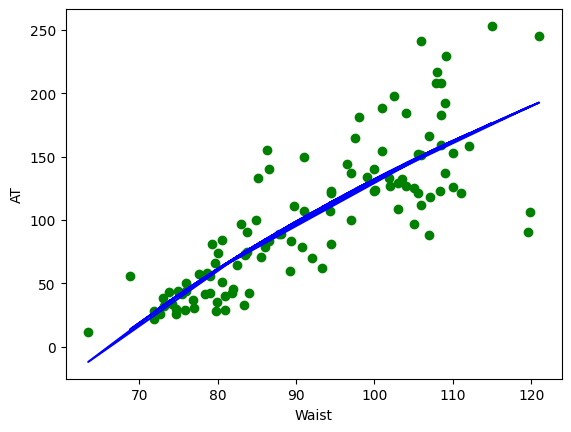

In [19]:
#this is how our log model look like..
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat['Waist'],pred2,color='blue')
plt.xlabel("Waist")
plt.ylabel("AT")

ACTUALLY THIS LOG MODEL ALSO DID NOT GIVE US THE TARGET RSQUARE VALUE..NOW WE WILL TRY ANOTHER TRANFORMATION, I.E EXPONENTIAL..

In [20]:
#y=B0+B1(x),i.e At=B0+B1(wc),This is our intial model right,
#This is our second Model using Log.. At=B0+B1log(wc),
#This is our new Model Exponential tranformation, log(At)=B0+B1(wc), below is the code,hw we write this..
model3=smf.ols('np.log(AT)~Waist',data=wcat).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           2.68e-30
Time:                        12:53:53   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SO here we got the RSquare as 0.70,i.e our model accuracy is 70%..now we need to do the predictions..

In [21]:
pred_log=model3.predict(pd.DataFrame(wcat['Waist']))
pred_log #so this gives us the log y values,i.e exponential(y) values..so we need only y values..

,0
0,3.749889
1,3.663346
2,4.033669
3,4.120211
4,3.745864
...,...
104,4.770288
105,4.496571
106,4.838717
107,5.084257


In [22]:
pred3=np.exp(pred_log)
pred3 #so this gives us the y values..

,0
0,42.516361
1,38.991601
2,56.467684
3,61.572246
4,42.345566
...,...
104,117.953181
105,89.709020
106,126.307181
107,161.459872


In [23]:
# RMSE value,i.e Total error value for the exponential model
rmse_exp = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred3))**2))
rmse_exp

np.float64(38.52900175807143)

Text(0, 0.5, 'AT')

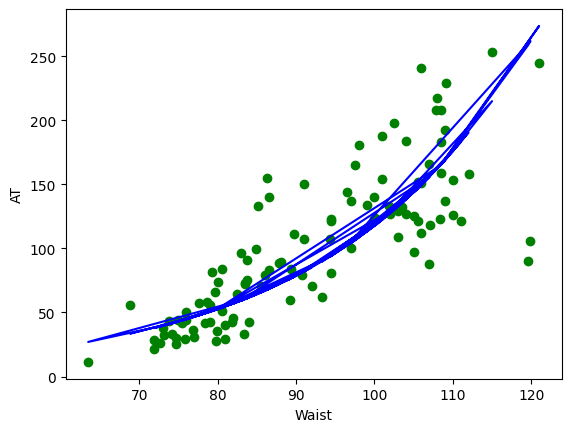

In [24]:
#This is our Exponential model..
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat['Waist'],pred3,color='blue')
plt.xlabel("Waist")
plt.ylabel("AT")

SO HRE WE WILL DO 4TH MODEL,I.E TRANSFORMATIONS

y=B0+B1(x),i.e  y=B0+B1(wc)This is our intial model right,
This is our second Model using Log.. y=B0+B1log(x),i.e  At=B0+B1log(wc)
log(y)=B0+B1(x),i.e  log(At)=B0+B1(wc),This was our 3rd model using exponential..


In [25]:
#y=B0+B1(x),i.e  y=B0+B1(wc)This is our intial model right,
#This is our 2nd Model using Log.. y=B0+B1log(x),i.e  At=B0+B1log(wc)
#log(y)=B0+B1(x),i.e  log(At)=B0+B1(wc),This was our 3rd model using exponential..
#log(y)=B0+B1(x)+B2(x)Square ,i.e log(At)=B0+B1(wc)+B2(wc)Square, SO this is our 4th model,this is the combination of exponential model & quadratic model

In [26]:
#as we have wcSquare in our model,we have created the column in dataset..
wcat["waist_sq"]=wcat.Waist*wcat.Waist
wcat

,Waist,AT,waist_sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225
...,...,...,...
104,100.10,124.00,10020.0100
105,93.30,62.20,8704.8900
106,101.80,133.00,10363.2400
107,107.90,208.00,11642.4100


In [27]:
model4=smf.ols("np.log(AT)~Waist+waist_sq",data=wcat).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.80e-35
Time:                        12:53:54   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
waist_sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

HERE WE GOT THE RSQUARE VALUE AS 0.77,i.e 77%

In [28]:
#WE CAN ALSO WRITE OUR 4TH MODEL AS,GEMINI CODE BELOW..
#YOU CAN USE EITHER ABOVE CODE OR BELOW GEMINI CODE..

In [29]:
# Fourth model: log(AT) = B0 + B1*Waist + B2*Waist^2 (Exponential + Quadratic)
model4 = smf.ols('np.log(AT) ~ Waist + np.power(Waist, 2)', data=wcat).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.80e-35
Time:                        12:53:54   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.8241      1

In [30]:
pred4=model4.predict(wcat)
pred4=np.exp(pred4) #as we have used log(AT) in preparing model somwe need to convert it back to y..
pred4


,0
0,36.779400
1,31.026570
2,60.145769
3,68.488132
4,36.497176
...,...
104,134.555999
105,108.012957
106,140.081911
107,154.205675


In [31]:
# RMSE value,i.e Total error value for our 4Th model..
rmse_quad = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred4))**2))
rmse_quad

np.float64(32.24444782776221)

SO HERE WE GOT MORE THAN RSQUARE= 0.77 WE EXPECTED WAS 0.75..AND RMSE=32.24

Text(0, 0.5, 'AT')

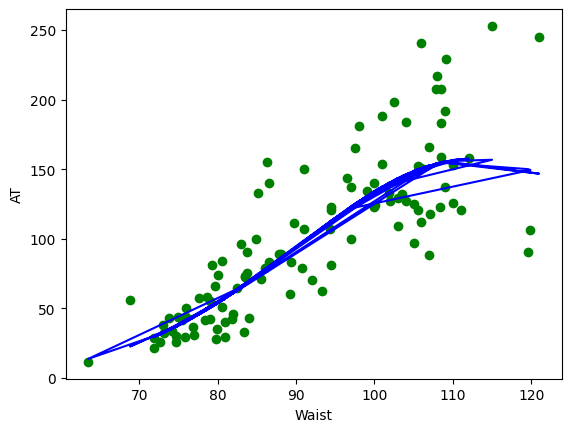

In [32]:
#4TH MODEL..
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat['Waist'],pred4,color='blue')
plt.xlabel("Waist")
plt.ylabel("AT")

In [33]:
data={"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
      "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
      "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table
#this shows all our 4 models,now we can see clearly which model is the best one..

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,32.760177,0.670037
1,rmse_log,32.496885,0.675319
2,rmse_exp,38.529002,0.707114
3,rmse_quad,32.244448,0.778982


SO HERE OUR 4TH MODEL IS THE BEST..BECAUSE OUR TARGET RSQUARE WAS 0.75..BUT THIS 4TH MODEL RSQUARE =0.77 AND RMSE=32.24(WHICH HAS LEAST ERROR VALUE COMPARED TO ALL MODEL)

### MODEL VALIDATION TECHNIQUE..

1.So here actually we have developed 4 models right,in that 4th model,ie quad model,we got has got RSquare is high and RMSE value is low, now we want to confirm the model is a VALID or NOT.so thats the reason we use MODEL VALIDATION..
2.so what this MODEL VALIDATION says that,we need to standardize the Errors..
3.and plot a HISTOGRAM..
4.if the mean of standardized error =0 & they are having constant variance from the mean value,Then we can say model developed is Valid one..
SO WE CAN EITHER PLOT THE HISTOGRAM OR WE CAN ANALYSE USING THE SCATTERPLOTS..

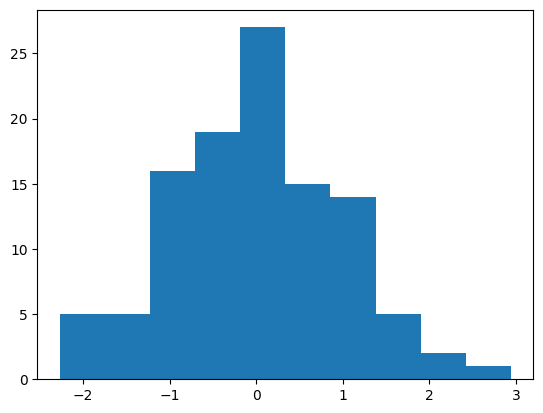

In [34]:
plt.hist(model4.resid_pearson)#THIS IS MODEL VALIDATION WITH HISTOGRAM..
plt.show()
#OUTPUT:SEE HERE THE MEAN =0 AND THERE IS A CONSTANT VARIANCE FROM THE "MEAN VALUE"

Text(0.5, 1.0, 'Residuals/Error vs Observation Number ')

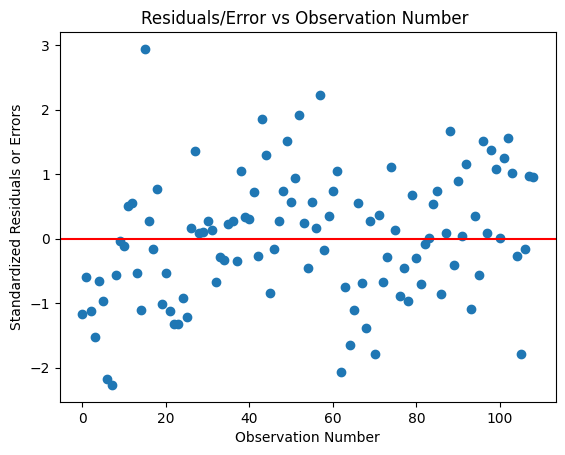

In [35]:
plt.scatter(np.arange(109),model4.resid_pearson) #THIS IS MODEL VALIDATION USING SCATTER PLOT..
plt.axhline(y=0,color='r')#THIS IS REFERENCE LINE WHERE YOU WANT..
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residuals or Errors")
plt.title("Residuals/Error vs Observation Number ")
#OUTPUT:SO HERE,AS U CAN  SEE MEAN=0 & FROM-1 TO 1 THERE ARE CONSTANT VARIANCE  FROM THE MEAN..
#SO AS U CAN SEE THAT THERE ARE SOME OBSERVATIONS FAR AWAY,THESE ARE KNOW AS OUTLIERS..SO U CAN BUILD BETTER MODEL IF U CAN HANDLE THESE OUTLIERS,THAT WE CAN SEE IN MULTIPLE LINEAR REGRESSION..